<a href="https://colab.research.google.com/github/Roshani9989/airbnb-data-analysis/blob/main/Roshani_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## Motivation


*   Millions of listings are genreared world widely each year and nearly half a million of guests checked in perday.
*   Analyzing these data facilites security improvement, business decisions making, understanding of guest's and host's beahaviour and performance on the platform, guiding marketing initiatives, implemention of innovative additional services and more.



In [ ]:
# Imprting all the library and module that we are going to use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:

#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset

In [ ]:
#Creating Directory Path(dir_path)
dir_path ='/content/drive/MyDrive/Colab Notebooks/Almabetter/Team Capstone Projects/Exploratory Data Analysis/'
#Reading Csv file and Creating data frame(df)
df = pd.read_csv(dir_path + 'Airbnb data NYC 2019.csv')

In [ ]:
# Finding the the numbers of rows(entries) and columns(faetues)
df.shape

(48895, 16)

In [ ]:
# Taking look on columns(faetues)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Finding the datatype(Dtype) of columns(faetues)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#Summary statastics Of Dataset

In [ ]:
#Summary Statastics
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#Taking a look on Dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [ ]:
#Taking a look on Dataset
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


#Cleaning of dataset

In [ ]:
#Finding the null values in the dataset
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64



*   As we can see in the above cell that many attributes have a lot of null values and some are not useful for analysis
*   Droping unecessary attributes which are not relevent: host name and last_review



In [ ]:
# Dropping the droping the unrelevent column
df.drop(columns=['host_name', 'last_review'], axis=1, inplace=True)

In [ ]:
# Replacing the missing values of reviews_per_month  with the mean values of thet column
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)

# Replacing the missing values of name with the empty string
df['name'].fillna('', inplace=True)
df.isnull().sum()

id                                0
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## **Data** **Analysis**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       10 non-null     object
 1   host_count  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


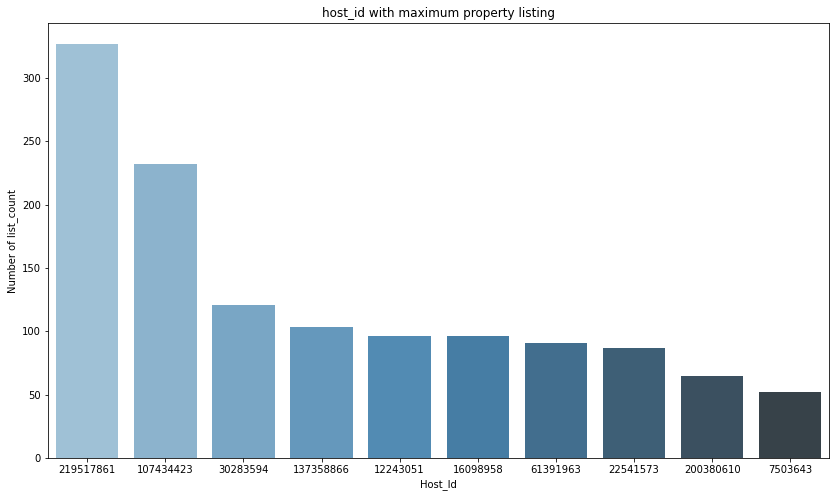

In [ ]:
# Analyzing how much maximum property a hosts own.(Taking only top 10)
top_host = df.host_id.value_counts(ascending=False).head(10).reset_index()
# Changing the dtypye of the index from num to str.
top_host = top_host.astype({"index": str})
top_host.rename(columns={ 'host_id' : 'host_count'},inplace = True)
top_host.info()
plt.figure(figsize=(14,8))
top_host_plot = sns.barplot(data= top_host, x="index", y="host_count", palette= "Blues_d")
top_host_plot.set_title("host_id with maximum property listing")
top_host_plot.set_xlabel("Host_Id")
top_host_plot.set_ylabel("Number of list_count")
plt.show()

In [ ]:
#Finding the unique neighbourhood_group
df['neighbourhood_group'].nunique()

5

In [ ]:
neighbourhood_group_count = df['neighbourhood_group'].value_counts()
neighbourhood_group_count

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

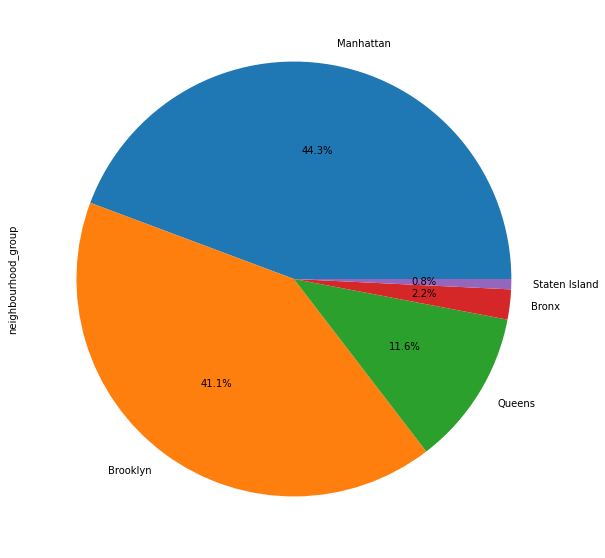

In [ ]:
plt.figure(figsize=(10,10))
neighbourhood_group_count.plot(kind = 'pie', autopct = "%1.1f%%")
plt.show()

In [ ]:
neighbourhood_group_avg_price = df.groupby(['neighbourhood_group']) ['price'].mean()
neighbourhood_group_avg_price

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

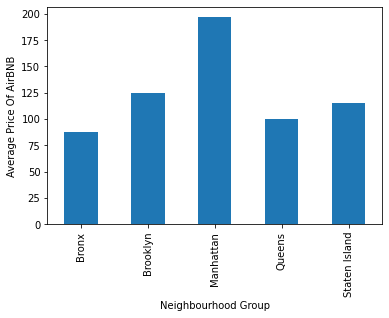

In [ ]:
plt.ylabel("Average Price Of AirBNB")
neighbourhood_group_avg_price.plot(kind = 'bar')
plt.xlabel("Neighbourhood Group")
plt.show()

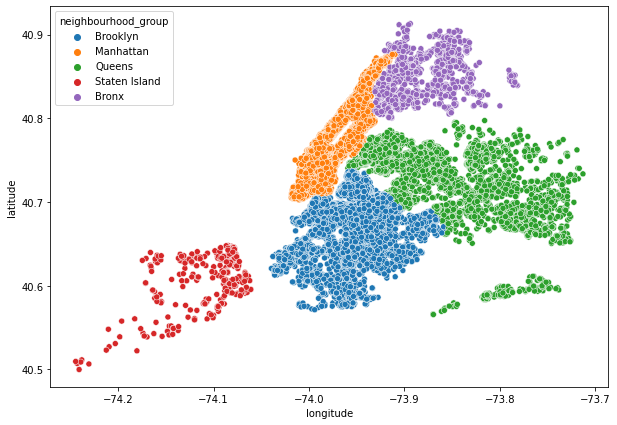

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()
plt.show()

Text(0, 0.5, 'Total No Of AirBNB')

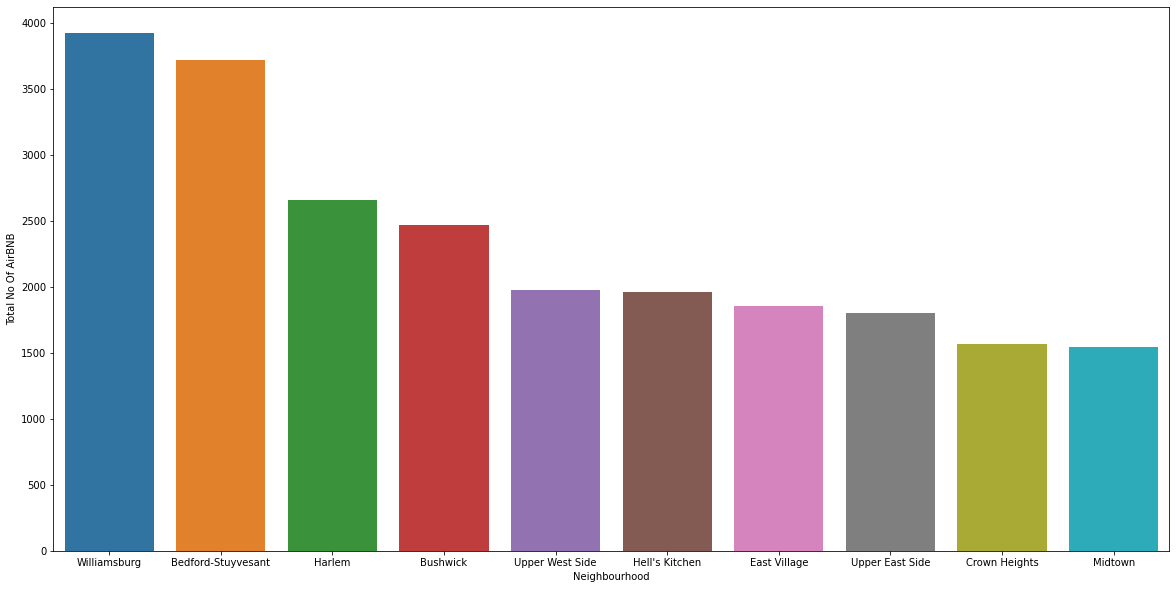

In [ ]:
neighbourhood_count = df['neighbourhood'].value_counts(ascending = False).reset_index().head(10)
neighbourhood_count
plt.figure(figsize=(20,10))
sns.barplot(data=neighbourhood_count, x='index', y='neighbourhood')
plt.xlabel("Neighbourhood")
plt.ylabel("Total No Of AirBNB")


In [ ]:
df['host_id'].nunique()

37457

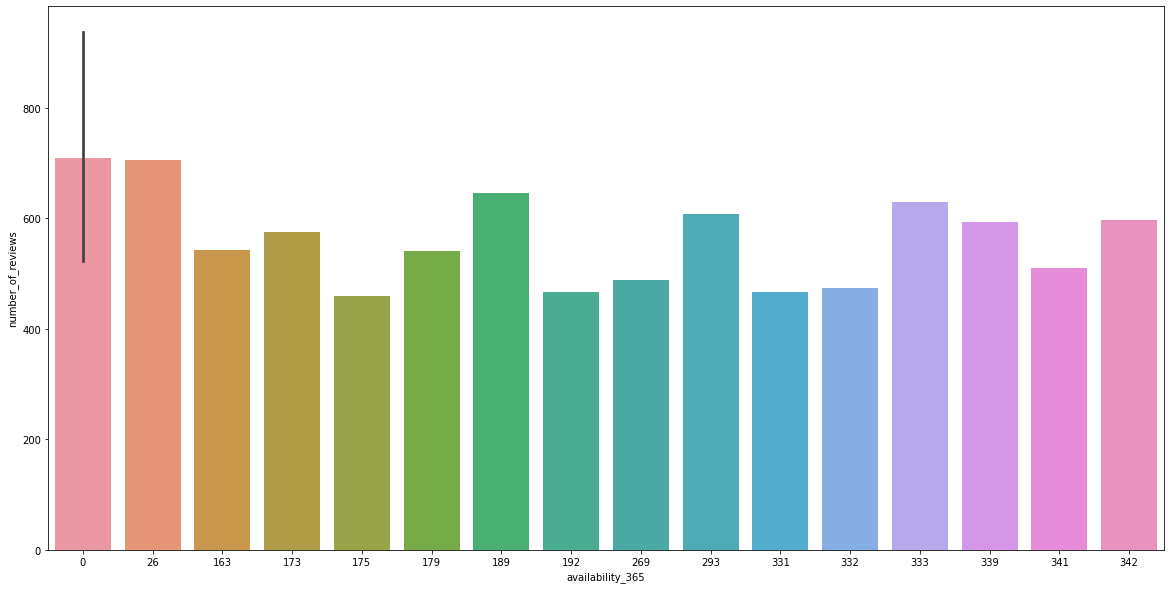

In [ ]:
df_1 = df.groupby(['host_id', 'availability_365']) ['number_of_reviews'].sum().reset_index()
df_1 = df_1.sort_values(by=['number_of_reviews'], ascending=False).head(20)
plt.figure(figsize=(20,10))
sns.barplot(data=df_1, x='availability_365', y='number_of_reviews')
plt.show()

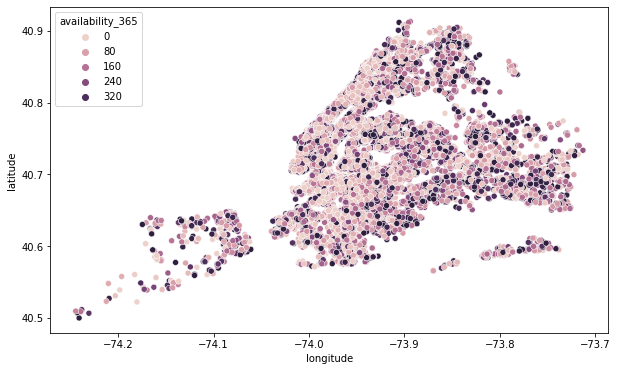

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.availability_365)
plt.ioff()

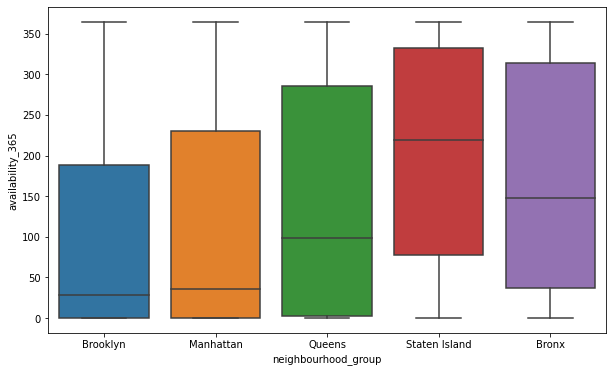

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='neighbourhood_group',y='availability_365', palette='plasma')
plt.show()